### **Anime Recommendation System using Collaborative Filtering and Content Based Recommendation Models**

####Panel: C    Batch: C1   Group: 11
####PC07 Govinda Talreja
####PC08 Zahra Shergadwala
####PC14 Aaditi Dube
####PC22 Vinayak Shet
####PC29 Vaishnavi Gholap


*Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

*Reading the datasets anime.csv and rating.csv*

In [2]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0


In [4]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [5]:
rating.describe()

,user_id,anime_id,rating
count,4.716923e+06,4.716923e+06,4.716922e+06
mean,2.230136e+04,9.502715e+03,6.128398e+00
std,1.276541e+04,8.926165e+03,3.747587e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.126000e+04,1.575000e+03,5.000000e+00
50%,2.262100e+04,7.054000e+03,7.000000e+00
75%,3.275400e+04,1.482900e+04,9.000000e+00
max,4.507300e+04,3.447500e+04,1.000000e+01


**DATA CLEANING**

In [6]:
# Lets have a look the distribution of ratings, because those "-1" are suspicious
rating.rating.value_counts()

 8.0     988867
-1.0     902965
 7.0     820249
 9.0     758414
 10.0    583479
 6.0     381239
 5.0     168392
 4.0      62924
 3.0      25487
 2.0      14488
 1.0      10418
Name: rating, dtype: int64

In [7]:
# I'm not sure what the "-1" mean because the ratings goes from 1 up to 10. 
# Maybe it means, that no rating are available. 
# Therefore we will delete the rows with "-1" in rating
rating = rating[rating["rating"] != -1]

In [8]:
print(f"anime.csv - rows: {anime.shape[0]}, columns: {anime.shape[1]}")
print(f"rating.csv - rows: {rating.shape[0]}, columns: {rating.shape[1]}")

anime.csv - rows: 12294, columns: 7
rating.csv - rows: 3813958, columns: 3


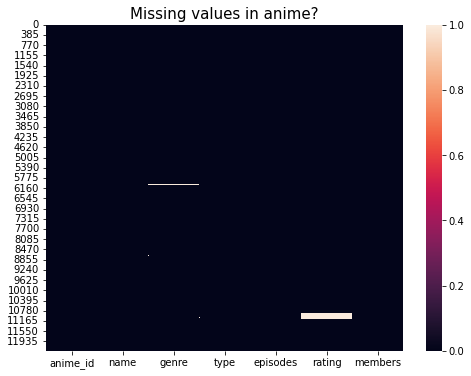

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull())
plt.title("Missing values in anime?", fontsize = 15)
plt.show()

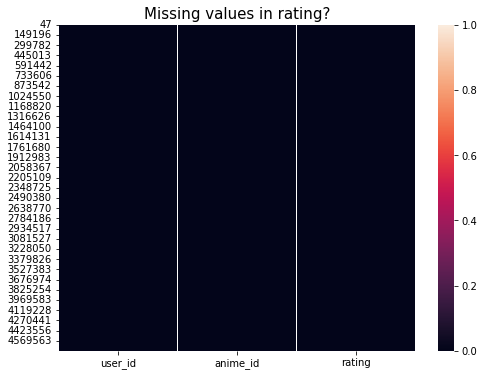

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(rating.isnull())
plt.title("Missing values in rating?", fontsize = 15)
plt.show()

In [11]:
# Merge anime and rating using "anime_id" as reference
# Keep only the columns we will use
df = pd.merge(rating,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)
df.head()

,user_id,rating,name
0,1,10.0,Highschool of the Dead
1,3,6.0,Highschool of the Dead
2,5,2.0,Highschool of the Dead
3,12,6.0,Highschool of the Dead
4,14,6.0,Highschool of the Dead


In [12]:
# Count the number of ratings for each anime
count_rating = df.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                            20923
Sword Art Online                      17475
Shingeki no Kyojin                    16670
Angel Beats!                          15604
Code Geass: Hangyaku no Lelouch       14472
                                      ...  
Karuizawa Syndrome                        1
Tenkousei wa Uchuujin                     1
Tenkousei                                 1
Kasa Jizou                                1
Junkers Come Here: Memories of You        1
Name: rating, Length: 9559, dtype: int64

In [13]:
# Some animes have only 1 rating, therefore it is better for the recommender system to ignore them
# We will keep only the animes with at least r ratings
r = 5000
more_than_r_ratings = count_rating[count_rating.apply(lambda x: x >= r)].index

# Keep only the animes with at least r ratings in the DataFrame
df_r = df[df['name'].apply(lambda x: x in more_than_r_ratings)]

In [14]:
before = len(df.name.unique())
after = len(df_r.name.unique())
rows_before = df.shape[0]
rows_after = df_r.shape[0]
print(f'''There are {before} animes in the dataset before filtering and {after} animes after the filtering.

{before} animes => {after} animes
{rows_before} rows before filtering => {rows_after} rows after filtering''')

There are 9559 animes in the dataset before filtering and 124 animes after the filtering.

9559 animes => 124 animes
3813956 rows before filtering => 969333 rows after filtering


**EXPLORATORY DATA ANALYSIS**

*1. Top 10 Anime based on Ratings*

Text(0, 0.5, 'User Rating count')

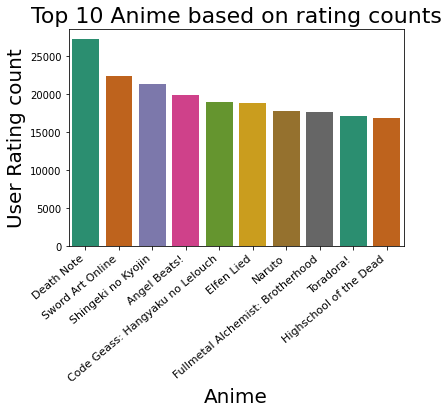

In [32]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

*2. Top 10 Anime based on Community size*

Text(0, 0.5, 'Community Size')

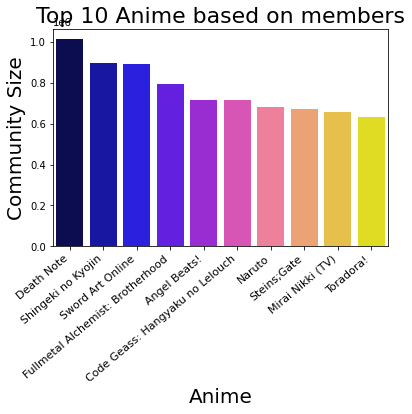

In [35]:
#Creating a copy and dropping the duplicates
duplicate_anime = anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)
#Plotting bar plot               
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

*3. Top Mediums of streaming*

In [36]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

### **Collaborative Filtering based Recommendation System**

In [15]:
# Create a matrix with userId as rows and the titles of the movies as column.
# Each cell will have the rating given by the user to the animes.
# There will be a lot of NaN values, because each user hasn't watched most of the animes
df_recom = df_r.pivot_table(index='user_id',columns='name',values='rating')
df_recom.iloc[:5,:5]

name,Accel World,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.0,8.0,NaN,10.0,8.0
5,3.0,4.0,3.0,7.0,NaN
7,8.0,NaN,NaN,NaN,NaN


In [16]:
df_r.name.value_counts().head(10)

Death Note                          20923
Sword Art Online                    17475
Shingeki no Kyojin                  16670
Angel Beats!                        15604
Code Geass: Hangyaku no Lelouch     14472
Elfen Lied                          14047
Fullmetal Alchemist: Brotherhood    13814
Naruto                              13346
Toradora!                           13132
Highschool of the Dead              12889
Name: name, dtype: int64

In [17]:
def find_corr(df, name):
    similar_to_movie = df.corrwith(df[name])
    similar_to_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    similar_to_movie = similar_to_movie.sort_values(by = 'Correlation', ascending = False)
    return similar_to_movie

    '''
    Get the correlation of one anime with the others
    
    Args
        df (DataFrame):  with user_id as rows and movie titles as column and ratings as values
        name (str): Name of the anime
    
    Return
        DataFrame with the correlation of the anime with all others
    '''

In [18]:
# Let's choose an anime
anime1 = 'Naruto'

# Let's try with "Naruto"

# Recommendations
find_corr(df_recom, anime1).head(40)


,Correlation
name,
Naruto,1.000000
Bleach,0.533507
Dragon Ball GT,0.437526
Dragon Ball Z,0.435625
Fairy Tail,0.431442
Sword Art Online,0.404941
Rosario to Vampire Capu2,0.402082
Ao no Exorcist,0.396723
Zero no Tsukaima: Princesses no Rondo,0.395094


In [19]:
# Not recommended
find_corr(df_recom, anime1).tail(40)

,Correlation
name,
Death Parade,0.238071
Kokoro Connect,0.229248
Clannad,0.229103
Yahari Ore no Seishun Love Comedy wa Machigatteiru.,0.228251
One Punch Man,0.224046
Suzumiya Haruhi no Yuuutsu (2009),0.223849
Fullmetal Alchemist: Brotherhood,0.221608
Summer Wars,0.220552
Hyouka,0.217731


In [20]:
# Let's choose an anime
anime2 = 'Death Note'

# Recommendations
find_corr(df_recom, anime2).head(40)

,Correlation
name,
Death Note,1.000000
Code Geass: Hangyaku no Lelouch R2,0.356697
Code Geass: Hangyaku no Lelouch,0.350421
Shingeki no Kyojin,0.337991
Naruto,0.325012
Bleach,0.315263
Dragon Ball Z,0.309946
Kuroshitsuji,0.298101
Elfen Lied,0.296553


In [21]:
# Not recommended
find_corr(df_recom, anime2).tail(40)

,Correlation
name,
Kiss x Sis (TV),0.200536
Black Lagoon,0.200498
Kokoro Connect,0.199511
K-On!!,0.198484
Black Bullet,0.198302
Rosario to Vampire Capu2,0.198112
Kill la Kill,0.197742
Rosario to Vampire,0.195846
K,0.195622


### **Content Based Recommendation System**

*Importing Libraries and reading the datasets anime.csv and rating.csv*

In [22]:
#reading the datasets
anime_data=pd.read_csv('anime.csv')
rating_data=pd.read_csv('rating.csv')

## print shape of dataset with rows and columns and information - anime_data
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())
## print shape of dataset with rows and columns and information- user rating
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
The shape of the  data is (row, column):(5376567, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376567 entries, 0 to 5376566
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 123.1 MB
None


In [23]:
#We are merging our csv's based on anime_id from both datasets and later we are renaming the columns
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


DATA CLEANING

*Removing the Special Characters and Japanese Characters*

In [24]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

EXPLORATORY DATA ANALYSIS

*1. Anime viewed on different streaming platforms*

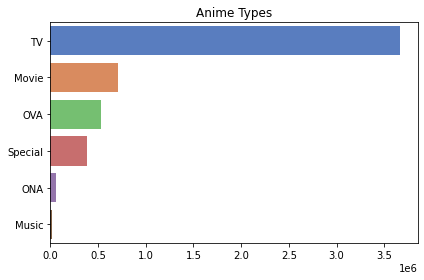

In [31]:
type_count = anime_fulldata['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Anime Types')

plt.tight_layout()
plt.show()

*2. Distribution of Anime Ratings*

Text(0.5, 1.0, 'Rating of users')

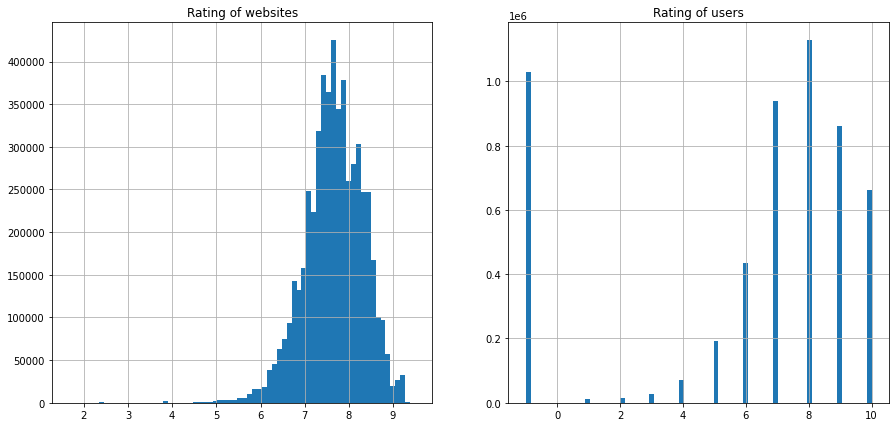

In [33]:
#Distribution of ratings
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

*3. Generating Word Cloud to know the different Anime Genres*

(-0.5, 799.5, 399.5, -0.5)

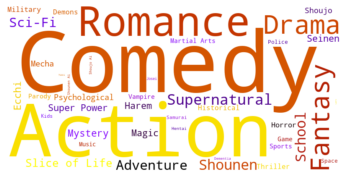

In [34]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

*Using Term Frequency and Inverse Document Frequency to recommend anime*

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [26]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [27]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})


*Recommended anime for the anime 'Naruto'*

In [37]:
give_rec('Naruto')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


*Recommended anime for the anime 'Naruto Shippuuden'.*

In [28]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


*Recommended anime for the anime 'Death Note'.*

In [29]:
give_rec('Death Note')

,Anime name,Rating
0,Death Note Rewrite,7.84
1,Mousou Dairinin,7.74
2,Higurashi no Naku Koro ni Kai,8.41
3,Higurashi no Naku Koro ni Rei,7.56
4,Bloody Night,4.26
5,Higurashi no Naku Koro ni,8.17
6,Shigofumi,7.62
7,Himitsu: The Revelation,7.42
8,Monster,8.72
9,Hikari to Mizu no Daphne,6.87
